This notebook is used to plot the result of MCMC sampling for the SW potential for silicon system.
It can also be used to reproduce the plots included in the proceeding paper in [Arxiv](https://arxiv.org/abs/2206.00578).
The preliminary calculation and sampling is done using `ptemcee_SW_uq.py` Python script, and can the result can be generated by running this script:
```bash
$ python ptemcee_SW_uq.py
```

In [1]:
# Run ptemcee_SW_uq.py to get retrieve the data
%run ptemcee_SW_uq.py

#================================================================================
# Available parameters to optimize.
# Parameters in `transformed` space.
# Model: SW_StillingerWeber_1985_Si__MO_405512056662_006
#================================================================================

name: A
value: [2.72686201]
size: 1

name: B
value: [-0.50712488]
size: 1

name: p
value: [4.]
size: 1

name: q
value: [0.]
size: 1

name: sigma
value: [0.73960128]
size: 1

name: gamma
value: [0.92192284]
size: 1

name: cutoff
value: [3.77118]
size: 1

name: lambda
value: [3.81841977]
size: 1

name: costheta0
value: [-0.33333333]
size: 1


#================================================================================
# Model parameters that are optimized.
# Note that the parameters are in the transformed space if 
# `params_transform` is provided when instantiating the model.
#================================================================================

A 1
  2.7268620056558381e+00 

B 1


/home/yonatank/.local/lib/python3.8/site-packages/numpy/linalg/linalg.py:2500: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = asarray(x)
2022-09-17 20:59:26.136 | INFO     | kliff.dataset.dataset:_read:398 - 400 configurations read from /home/yonatank/package_testing/test_kliff/kliff_uq/Si_training_set/varying_alat
2022-09-17 20:59:26.538 | INFO     | kliff.calculators.calculator:create:107 - Create calculator for 400 configurations.
2022-09-17 20:59:26.539 | INFO     | kliff.loss:minimize:290 - Start minimization using method: lm.
2022-09-17 20:59:26.549 | INFO     | kliff.loss:_scipy_optimize:404 - Running in serial mode.
2022-09-17 20:59:42.112 | INFO     | kliff.loss:minimize:292 - Finish minimization using method: lm.


#================================================================================
# Model parameters that are optimized.
# Note that the parameters are in the transformed space if 
# `params_transform` is provided when instantiating the model.
#================================================================================

A 1
  2.7268978721713277e+00 

B 1
 -5.0705867478211630e-01 

sigma 1
  7.3958247395459875e-01 

lambda 1
  3.8183199341623393e+00 

gamma 1
  9.2188917820516869e-01 


Estimated burn-in time: 2379, set to: 10000
Estimated autocorrelation length: 15, set to: 200
$\hat{{r}}^p$ values:
 [1.02987439 1.03383234 1.0347462  1.02704473 1.04195414 1.03674333
 1.04597542 1.03614941 1.01832548 1.00156429 1.0024527  1.00280717
 1.00231672 1.00166217 1.00278497 1.00243874]


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner

fig_kwargs = dict(dpi=150, facecolor="w")
%matplotlib inline

In [3]:
print("Temperatures:", Tladder)

# Temperatures that we care (T={1e2, 1e3, 1e4, 1e5})
tidx_target = [5, 7, 9, 11]  # Index of the temperature in the ladder that we care

Temperatures: [1.00000000e+00 1.32419627e+00 3.16227766e+00 1.00000000e+01
 3.16227766e+01 1.00000000e+02 3.16227766e+02 1.00000000e+03
 3.16227766e+03 1.00000000e+04 3.16227766e+04 1.00000000e+05
 3.16227766e+05 1.00000000e+06 3.16227766e+06 1.00000000e+07]


In [4]:
# Get the colors to represent the temperatures
colors = mpl.cm.get_cmap("inferno")(np.linspace(0, 1, len(tidx_target) + 1)[:-1])

# These are the names of parameters in log space
labels = [
    r"$\log(A)$",
    r"$\log(B)$",
    r"$\log(\sigma)$",
    r"$\log(\lambda)$",
    r"$\log(\gamma)$",
]

# Corner plot

In [5]:
def plot_corner(tidx):
    """Plot the MCMC result sampled at the requested temperature as a corner plot.

    Parameters
    ----------
    tidx: int
        Index of the requested temperature from the list of temperature ladder. For
        this notebook, only index included in `tidx_target` would work.
    """
    assert tidx in tidx_target
    idx = tidx_target.index(tidx)

    samples_T = samples[tidx].reshape((-1, ndim))
    fig, axes = plt.subplots(nrows=ndim, ncols=ndim, figsize=(ndim, ndim), **fig_kwargs)

    corner.corner(
        samples_T,
        range=np.tile([-8, 8], (ndim, 1)),
        bins=100,
        fig=fig,
        labels=labels,
        hist_kwargs=dict(color=colors[idx], histtype="stepfilled"),
        **dict(
            color=colors[idx],
            plot_density=False,
            plot_contours=False,
            data_kwargs=dict(alpha=0.5),
        )
    )

    return fig, axes

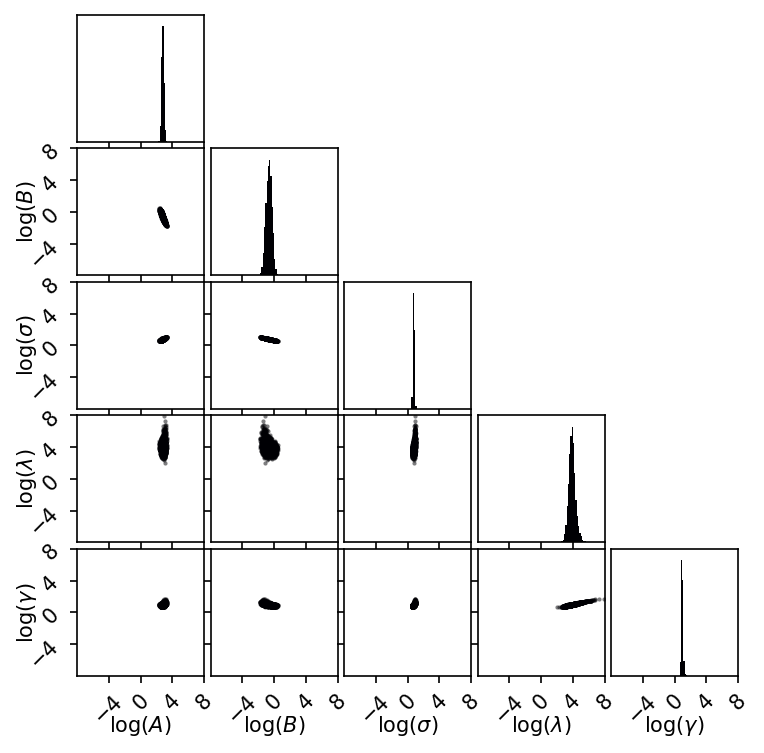

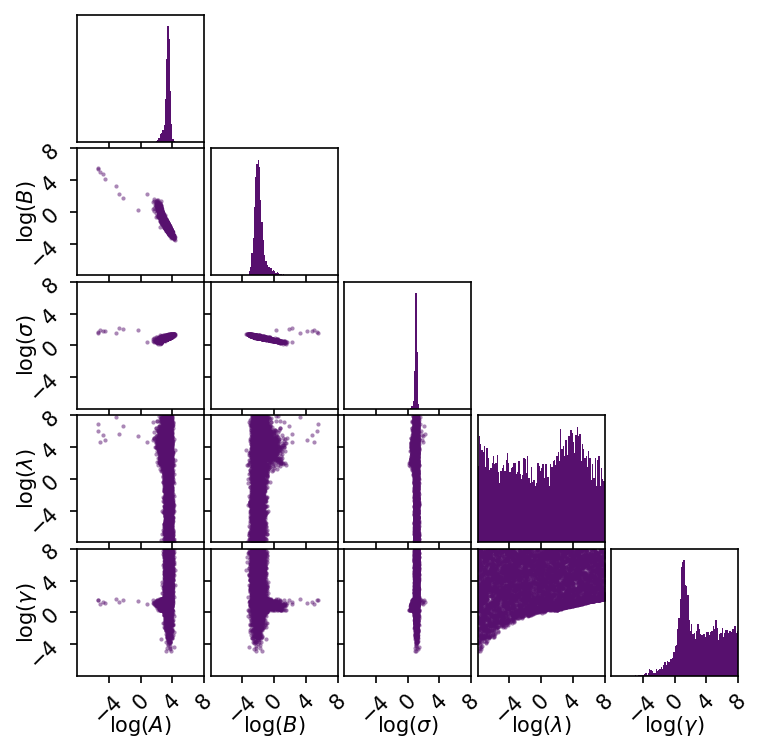

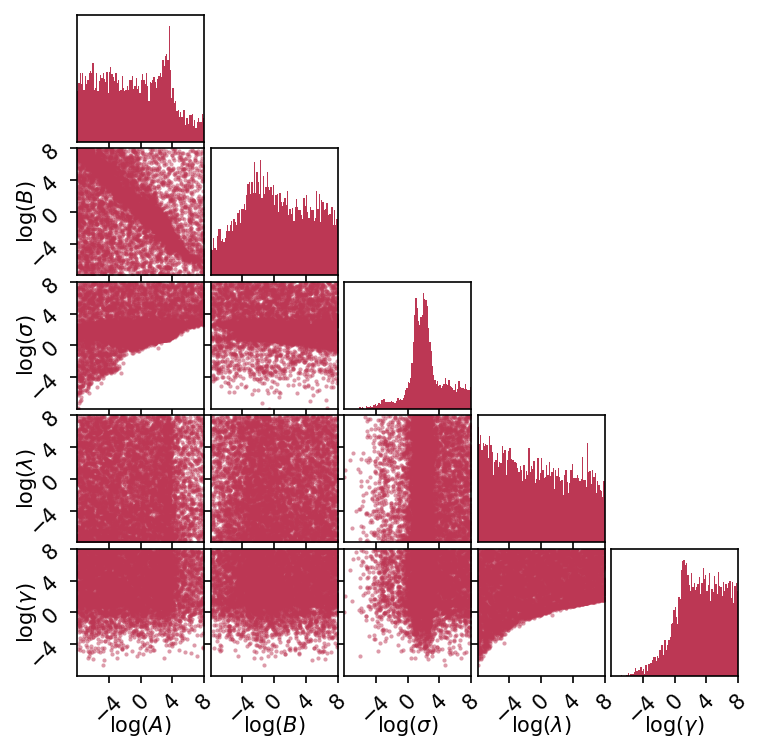

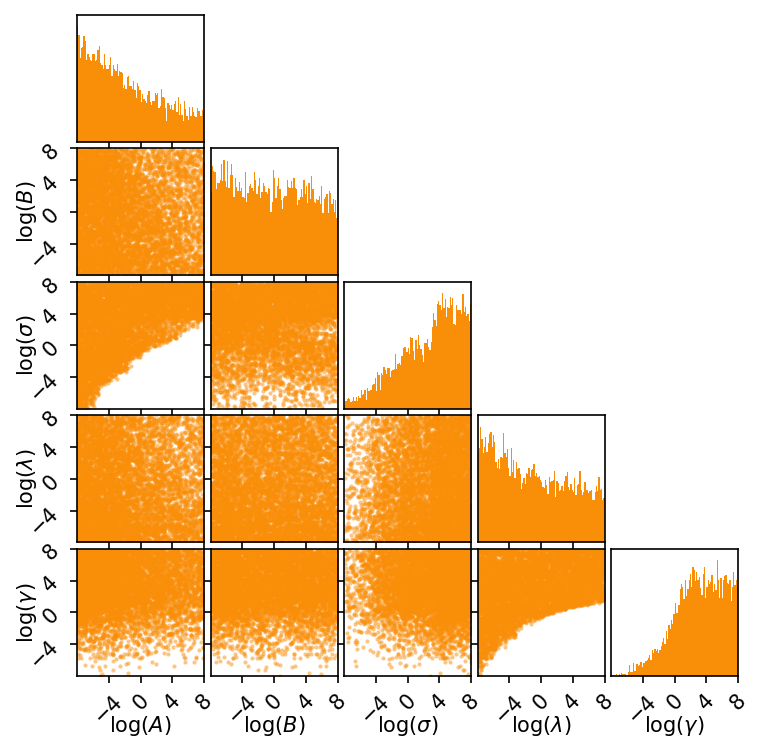

In [6]:
for tidx in tidx_target:
    plot_corner(tidx)
plt.show()
plt.close()

# Compare the marginal distributions

In [7]:
# Define utility functions to write the temperature legend
from decimal import Decimal


def fexp(number):
    number = round(number)
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1


def fman(number):
    number = round(number)
    return Decimal(number).scaleb(-fexp(number)).normalize()

For the following plot, we will plot the marginal distribution of the samples for each parameter.
The histograms on the first (top) row has the y-axes in the regular, linear scale, while on the second (bottom) row, the y-axes are in logarithmic scale.

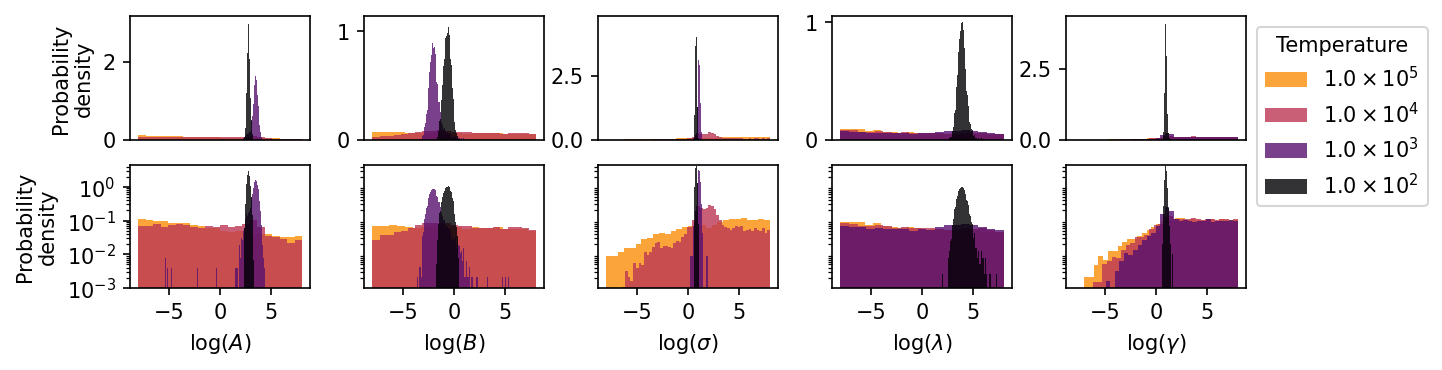

In [8]:
# For the plotting purpose, we will plot the result from the highest to the lowest
# temperature.
tidx_plot = tidx_target[::-1]
colors_plot = colors[::-1]

fig, axes = plt.subplots(
    nrows=2, ncols=ndim, figsize=((ndim + 1) * 1.6, 2.4), **fig_kwargs
)
plt.subplots_adjust(wspace=0.3)

# We want to just use one ylim for the plots on the second row. So, we need to find
# the maximum range.
ymax_per_temp = []  # This will store the maximum height for each temperature

for ii, tidx in enumerate(tidx_plot):
    # Retrieve the samples for each temperature
    samples_T = samples[tidx].reshape((-1, ndim))
    # Get a legend string for each temperature
    T = Tladder[tidx]
    legend_label = f"${fman(T):0.1f} \\times 10^{{{fexp(T)}}}$"

    # Plot the histogram for each parameter
    ymax_per_col = []  # A list to store the maximum histogram height per column.
    for col in range(ndim):
        ax1 = axes[0, col]  # On the top row
        ax2 = axes[1, col]  # On the bottom row

        # Histogram with y-axis in linear scale
        ax1.hist(
            samples_T[:, col],
            bins="auto",
            density=True,
            color=colors_plot[ii],
            alpha=0.8,
            label=legend_label,
        )

        # Histogram with y-axis in log scale
        h, _, _ = ax2.hist(
            samples_T[:, col],
            bins="auto",
            density=True,
            log=True,
            color=colors_plot[ii],
            alpha=0.8,
        )
        ymax_per_col.append(np.max(h))

        # Axes labels
        ax1.set_xticks([])
        ax2.set_xlabel(labels[col])
        if col == 0:
            ax1.set_ylabel("Probability\ndensity")
            ax2.set_ylabel("Probability\ndensity")

    ymax_per_temp.append(np.max(ymax_per_col))

# Post process to set ylim of the plots on the second row and the legend.
for col in range(ndim):
    # Color legend on the last column
    if col == ndim - 1:
        axes[0, col].legend(title="Temperature", bbox_to_anchor=(1.0, 1.0))

    # ylim on the second row
    axes[1, col].set_ylim(top=np.max(ymax_per_temp), bottom=1e-3)
    # Since ylim are all the same on each column, we don't need the tick labels,
    # except for the first column.
    if col > 0:
        axes[1, col].set_yticks([])

plt.show()
plt.close()

# Compare the cost distribution

In [9]:
# Load the log-likelihood data. The cost is negative log-likelihood.
loglikelihood = np.load("data/ptemcee_SW_loglikelihood.npy")

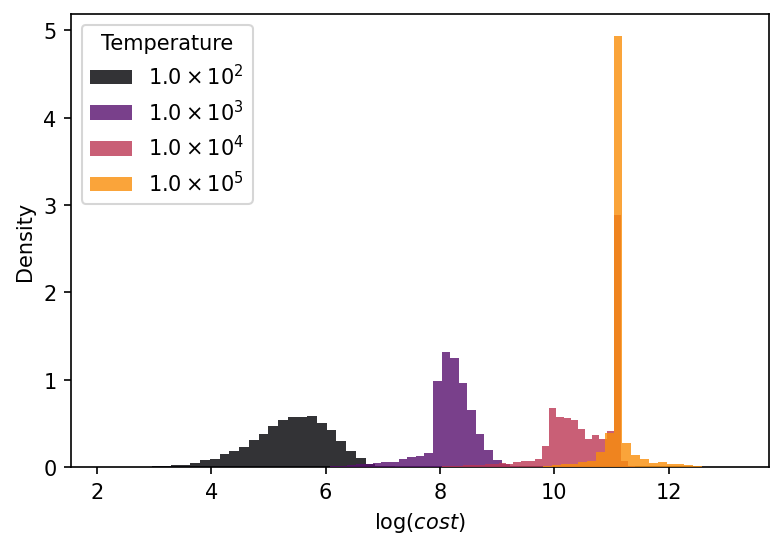

In [10]:
plt.figure(**fig_kwargs)
for ii, tt in enumerate(tidx_target):
    # Get the cost data for the histogram of the samples. Since the scale of the cost
    # is large, we will instead consider the log of the cost.
    hist_data = np.log(-loglikelihood[tt, :, burnin::thin].flatten())
    # Get a legend string for each temperature
    T = Tladder[tt]
    label = f"${fman(T):0.1f} \\times 10^{{{fexp(T)}}}$"

    # Plot the histogram of the cost (or log of the cost to be more precise).
    plt.hist(
        hist_data,
        bins=30,
        density=True,
        color=colors[ii],
        alpha=0.8,
        label=label,
        zorder=tt,
    )

# Labels and legend
plt.xlabel(r"$\log(cost)$")
plt.ylabel("Density")
plt.legend(title="Temperature")

plt.show()
plt.close()